In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import swifter
import geopandas as gpd
from shapely.geometry import Point,LineString
import seaborn as sns
# from tqdm._tqdm_notebook import tqdm_notebook


1. 预处理

In [2]:
datapath = './data/'
data = pd.read_pickle(datapath + 'fix_time_data.pkl')
# .drop('Unnamed: 0',axis=1)
# data0 = pd.read_csv(datapath + 'data0.csv', encoding='gbk')
# data1 = pd.read_csv(datapath + 'data1.csv', encoding='gbk')
station = pd.read_csv(datapath + 'station.csv')

In [3]:
def show_empty(data):
    for col in data.columns:
        print('{} empty lines: {}'.format(
            col,
            len(data.loc[data[col] == '----'])
        ))

In [17]:
# data.isnull().sum()

In [18]:
# show_empty(data1)
# show_empty(data)

In [19]:
# data[data.isnull().T.any()].name.unique()

In [20]:
# show_empty(data1)

real - std = delta

2. 全网到达和出发准点率

In [15]:
data = fullline

In [16]:
len(data.loc[(data['late_arrive'] <= 1) &
                (data['late_arrive'] >= -1)]) / len(data)

0.3977311497782327

In [17]:
len(data.loc[(data['late_depart'] <= 1) &
                (data['late_depart'] >= -1)]) / len(data)

0.5201580802911406

In [18]:
data['arrrive_acc'] = ((data['late_arrive'] <= 1) &
                (data['late_arrive'] >= -1))
data['depart_acc'] = ((data['late_depart'] <= 1) &
                (data['late_depart'] >= -1))

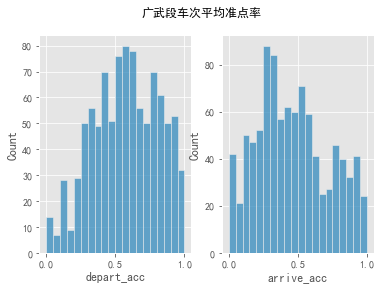

In [19]:
plotdf = data.groupby('code').agg('mean').reset_index()
plt.style.use('ggplot')
fig,ax = plt.subplots(1,2)
# fig.suptitle('车次准点率')
# fig.suptitle('京广线车次平均准点率')
# fig.suptitle('广州局车次平均准点率')
fig.suptitle('广武段车次平均准点率')
sns.histplot(
  plotdf['arrive_acc'],
  ax=ax[1],
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
  bins=20
)
sns.histplot(
  plotdf['depart_acc'],
  ax=ax[0],
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
  bins=20
)

sns.set(rc={'figure.figsize':(10,4)})
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [119]:
# stationlist = '北京西站、涿州东站、高碑店东站、保定东站、定州东站、正定机场站、石家庄站、高邑西站、邢台东站、邯郸东站、安阳东站、鹤壁东站、新乡东站、郑州东站、许昌东站、漯河西站、驻马店西站、明港东站、信阳东站、孝感北站、武汉站、咸宁北站、赤壁北站、岳阳东站、汨罗东站、长沙南站、株洲西站、衡山西站、衡阳东站、郴州西站、韶关站、英德西站、清远站、广州北站、广州南站'
stationlist = '武汉站、长沙南站、衡阳东站、英德西站、广州南站'
stationlist = stationlist.split('、')
stationlist = [_[:-1] for _ in stationlist]
# stationlist
fullline = data.set_index('name', drop=False).loc[stationlist].reset_index(drop=True)
fullline['date'] = pd.to_datetime(fullline['date'])
# fullline
daylow = dt(year=2018, month=1, day=1, hour=0, minute=0)
dayhigh = dt(year=2018, month=1, day=12, hour=0, minute=0)
plotdf = fullline.loc[(fullline['std_arrive'] <= dayhigh)
                & (fullline['std_arrive'] >= daylow)].groupby(['name','date']).agg('mean')
plotdf = plotdf.reset_index()
plotdf = plotdf.set_index('name').loc[stationlist]
plotdf = plotdf.reset_index()
plotdf
# .sort_values('late_depart', ascending=False)

name       date  late_arrive  late_depart         lon        lat  \
0    武汉 2018-01-01    -1.326446    -0.392562  114.424314  30.606697   
1    武汉 2018-01-02    -1.441667    -0.379167  114.424314  30.606697   
2    武汉 2018-01-03     1.729167     1.966667  114.424314  30.606697   
3    武汉 2018-01-04    68.174274    69.365145  114.424314  30.606697   
4    武汉 2018-01-05    39.264069    38.679654  114.424314  30.606697   
5    武汉 2018-01-06    36.114407    35.894068  114.424314  30.606697   
6    武汉 2018-01-07    32.797414    32.564655  114.424314  30.606697   
7    武汉 2018-01-08    12.102041    12.787755  114.424314  30.606697   
8    武汉 2018-01-09    -0.854167    -0.270833  114.424314  30.606697   
9    武汉 2018-01-10    -0.211864     0.326271  114.424314  30.606697   
10   武汉 2018-01-11    -1.096491    -0.350877  114.424314  30.606697   
11  长沙南 2018-01-01    -2.125806    -0.232258  113.065510  28.147093   
12  长沙南 2018-01-02    -1.979592    -0.452381  113.065510  28.147093   
13  长沙南 2018-01-03    -1.427083     0.229167  113.065510  28.147093   
14  长沙南 2018-01-04    24.563433    27.787313  113.065510  28.147093   
15  长沙南 2018-01-05    30.519737    31.125000  113.065510  28.147093   
16  长沙南 2018-01-06    16.400000    17.080645  113.065510  28.147093   
17  长沙南 2018-01-07    19.113636    19.629870  113.065510  28.147093   
18  长沙南 2018-01-08    -1.238411    -0.324503  113.065510  28.147093   
19  长沙南 2018-01-10    -1.250836    -0.287625  113.065510  28.147093   
20  长沙南 2018-01-11    -0.952542    -0.166102  113.065510  28.147093   
21  衡阳东 2018-01-01     0.077295     0.309179  112.709559  26.896474   
22  衡阳东 2018-01-02     0.140000     0.295000  112.709559  26.896474   
23  衡阳东 2018-01-03     0.656410     0.892308  112.709559  26.896474   
24  衡阳东 2018-01-04    31.468927    31.559322  112.709559  26.896474   
25  衡阳东 2018-01-05    33.950249    34.059701  112.709559  26.896474   
26  衡阳东 2018-01-06    21.956098    22.146341  112.709559  26.896474   
27  衡阳东 2018-01-07    21.384236    21.847291  112.709559  26.896474   
28  衡阳东 2018-01-08    10.884422    10.743719  112.709559  26.896474   
29  衡阳东 2018-01-09     1.812183     2.020305  112.709559  26.896474   
30  衡阳东 2018-01-10     1.528796     1.575916  112.709559  26.896474   
31  衡阳东 2018-01-11     1.940217     1.885870  112.709559  26.896474   
32  英德西 2018-01-01     0.312500     0.000000  113.352340  24.159442   
33  英德西 2018-01-02     0.000000    -0.178571  113.352340  24.159442   
34  英德西 2018-01-03     3.896552     3.689655  113.352340  24.159442   
35  英德西 2018-01-04    20.880000    20.760000  113.352340  24.159442   
36  英德西 2018-01-05    40.448276    40.758621  113.352340  24.159442   
37  英德西 2018-01-06    22.357143    22.821429  113.352340  24.159442   
38  英德西 2018-01-07    18.551724    18.551724  113.352340  24.159442   
39  英德西 2018-01-08    15.038462    15.000000  113.352340  24.159442   
40  英德西 2018-01-09     1.482759     1.310345  113.352340  24.159442   
41  英德西 2018-01-10     1.724138     1.482759  113.352340  24.159442   
42  英德西 2018-01-11     1.000000     0.866667  113.352340  24.159442   
43  广州南 2018-01-01    -1.246154    -0.292308  113.269114  22.988374   
44  广州南 2018-01-02    -1.204918     0.262295  113.269114  22.988374   
45  广州南 2018-01-03     0.180180     1.396396  113.269114  22.988374   
46  广州南 2018-01-04    10.523364    11.177570  113.269114  22.988374   
47  广州南 2018-01-05    13.206612    13.628099  113.269114  22.988374   
48  广州南 2018-01-06     9.710938     9.828125  113.269114  22.988374   
49  广州南 2018-01-07     8.830769     8.961538  113.269114  22.988374   
50  广州南 2018-01-08     3.264000     3.392000  113.269114  22.988374   
51  广州南 2018-01-09    -0.833333    -0.391667  113.269114  22.988374   
52  广州南 2018-01-10    -1.098214    -0.678571  113.269114  22.988374   
53  广州南 2018-01-11    -0.769912    -0.345133  113.269114  22.988374   

    index_right  arrive_acc  depart_acc  
0          16.0    0.309917    0.690083  
1          16

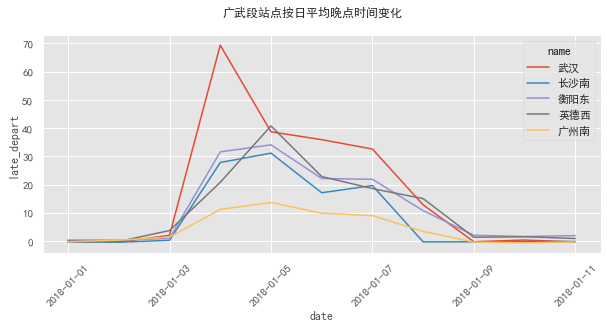

In [122]:
# data['date'] = pd.to_datetime( data['date'])
# plotdf = data.groupby('date').agg('mean').reset_index()

plt.style.use('ggplot')
fig,ax = plt.subplots()
# fig.suptitle('广州局按日平均准点率')
fig.suptitle('广武段站点按日平均晚点时间变化')
# sns.lineplot(
#   data = plotdf,
#   x = 'date',
#   y = 'arrrive_acc',
#   ax=ax,
#   # kind="hist", 
#   # aspect=1.4, 
#   # log_scale=10, 
# )
# ax[0].tick_params(axis='x', rotation=45)

# df = plotdf.loc[station]
sns.lineplot(
  data = plotdf,
  x = 'date',
  # y = 'depart_acc',
  y = 'late_depart',
  hue='name',
  legend=True
  # ax=ax,
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
  
)
ax.tick_params(axis='x', rotation=45)
# ax.legend(['arrive','depart'])
sns.set(rc={'figure.figsize':(10,4)})
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

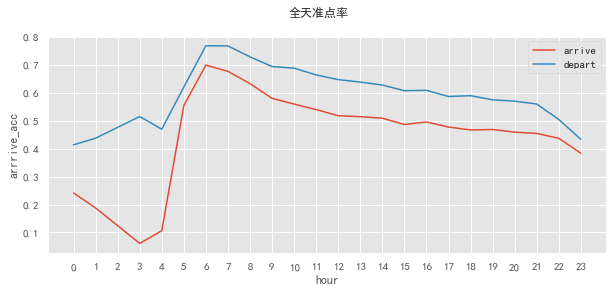

In [93]:
# data['date'] = pd.to_datetime( data['date'])
data['hour'] = [_.hour for _ in data['std_depart']]
plotdf = data.groupby('hour').agg('mean').reset_index()

plt.style.use('ggplot')
fig,ax = plt.subplots()
fig.suptitle('全天准点率')
sns.lineplot(
  data = plotdf,
  x = 'hour',
  y = 'arrrive_acc',
  ax=ax,
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
# ax[0].tick_params(axis='x', rotation=45)
sns.lineplot(
  data = plotdf,
  x = 'hour',
  y = 'depart_acc',
  ax=ax,
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
ax.set_xticks(range(0,24))
# ax.tick_params(axis='x', rotation=45)
ax.legend(['arrive','depart'])
sns.set(rc={'figure.figsize':(10,4)})
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

3. 全网出发到达晚点时间分布特征

tasks:
* 补数据
* 准点概念
* 具体时间列
* 选一车次分析区间运行时间、旅行速度、停站时间
* 对虹桥站分析出发到达晚点分布
* 选择京沪线，定义高铁运行状态指标体系
* 

In [4]:
province  = gpd.read_file('./data/province.shp', encoding = 'utf-8')
province = province.loc[range(34),['name','geometry']]
province = province.rename({'name':'province'}, axis=1)
province = province.set_crs(4326).to_crs(3857)
province.head(2)

province                                           geometry
0      北京市  POLYGON ((13067781.555 4899124.021, 13067095.8...
1      天津市  MULTIPOLYGON (((13109606.848 4779207.101, 1310...

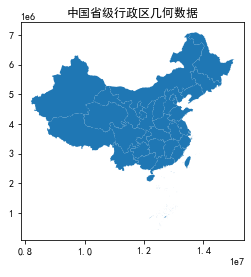

In [13]:
gpd.GeoDataFrame(province).plot()
plt.title('中国省级行政区几何数据')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [59]:
# data = gpd.GeoDataFrame(data, crs=4326)
# data = data.sjoin(province, how="left")
# data.to_pickle('data_provinced.pkl')
data = pd.read_pickle('./data/data_provinced.pkl')
data['arrive_acc'] = ((data['late_arrive'] <= 1) &
                (data['late_arrive'] >= -1))
data['depart_acc'] = ((data['late_depart'] <= 1) &
                (data['late_depart'] >= -1))
data = gpd.GeoDataFrame(data, crs=4326)
data

code name          std_arrive         real_arrive  late_arrive  \
0         D1   北京 2018-01-21 18:08:00 2018-01-21 18:08:00            0   
1         D1  唐山北 2018-01-21 19:19:00 2018-01-21 19:19:00            0   
2         D1   北京 2018-01-22 18:08:00 2018-01-22 18:08:00            0   
3         D1  唐山北 2018-01-22 19:19:00 2018-01-22 19:19:00            0   
4         D1   北京 2018-01-23 18:08:00 2018-01-23 18:08:00            0   
...      ...  ...                 ...                 ...          ...   
1115524  G98   郑州 2018-01-18 11:47:00 2018-01-18 11:45:00           -2   
1115525  G98   郑州 2018-01-19 11:47:00 2018-01-19 11:45:00           -2   
1115526  G98   郑州 2018-01-20 11:47:00 2018-01-20 11:45:00           -2   
1115527  G98   郑州 2018-01-21 11:47:00 2018-01-21 11:45:00           -2   
1115528  G98   郑州 2018-01-22 11:47:00 2018-01-22 11:45:00           -2   

                 std_depart         real_depart  late_depart       date  \
0       2018-01-21 18:08:00 2018-01-21 18:08:00            0  2018/1/21   
1       2018-01-21 19:20:00 2018-01-21 19:20:00            0  2018/1/21   
2       2018-01-22 18:08:00 2018-01-22 18:08:00            0  2018/1/22   
3       2018-01-22 19:20:00 2018-01-22 19:20:00            0  2018/1/22   
4       2018-01-23 18:08:00 2018-01-23 18:08:00            0  2018/1/23   
...                     ...                 ...          ...        ...   
1115524 2018-01-18 11:50:00 2018-01-18 11:50:00            0  2018/1/18   
1115525 2018-01-19 11:50:00 2018-01-19 11:50:00            0  2018/1/19   
1115526 2018-01-20 11:50:00 2018-01-20 11:50:00            0  2018/1/20   
1115527 2018-01-21 11:50:00 2018-01-21 11:50:00            0  2018/1/21   
1115528 2018-01-22 11:50:00 2018-01-22 11:50:00            0  2018/1/22   

                lon        lat                    geometry  index_right  \
0        116.427694  39.902779  POINT (116.42769 39.90278)            0   
1        118.118620  39.816327  POINT (118.11862 39.81633)            2   
2        116.427694  39.902779  POINT (116.42769 39.90278)            0   
3        118.118620  39.816327  POINT (118.11862 39.81633)            2   
4        116.427694  39.902779  POINT (116.42769 39.90278)            0   
...             ...        ...                         ...          ...   
1115524  113.658097  34.745795  POINT (113.65810 34.74580)           15   
1115525  113.658097  34.745795  POINT (113.65810 34.74580)           15   
1115526  113.658097  34.745795  POINT (113.65810 34.74580)           15   
1115527  113.658097  34.745795  POINT (113.65810 34.74580)           15   
1115528  113.658097  34.745795  POINT (113.65810 34.74580)           15   

        province  arrive_acc  depart_acc  
0            北京市        True        True  
1            河北省        True        True  
2            北京市        True        True  
3            河北省        True        True  
4            北京市        True        True  
...          ...         ...         ...  
1115524      河南省       False        True  
1115525      河南省       False        True  
1115526      河南省       False        True  
1115527      河南省       False        True  
1115528      河南省       False        True  

[1115529 rows x 16 columns]

In [97]:
# acc = gpd.GeoDataFrame()
# acc['province'] = province['province']
# acc['acc_arrive'] = [0 for _ in range(len(acc))]
# acc['acc_depart'] = [0 for _ in range(len(acc))]
# for i,row in acc.iterrows():
#     province = row['province']
#     acc_a = len(data.loc[(data['late_arrive'] == 0 )&(data['province']==province)])
#     acc_d = len(data.loc[(data['late_depart'] == 0 )&(data['province']==province)])
#     alld = len(data.loc[data['province']==province])
#     if alld != 0:
#         acc.loc[i,'acc_arrive'] = acc_a/alld
#         acc.loc[i,'acc_depart'] = acc_d/alld
# acc

In [104]:

# plotdf

In [21]:
data = fullline

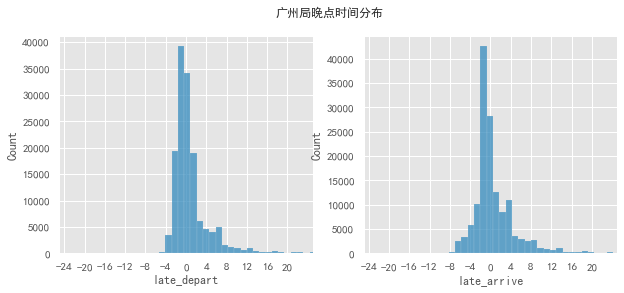

In [144]:
plotdf = data.reset_index()
plt.style.use('ggplot')
fig,ax = plt.subplots(1,2)
# fig.suptitle('晚点时间分布')
fig.suptitle('广州局晚点时间分布')
sns.histplot(
  x=plotdf['late_depart'],
  ax=ax[0],
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
  # color='lightblue',
  bins=200
)
ax[0].set_xlim([-25,25])
ax[0].set_xticks(range(-24,24,4))
sns.histplot(
  x=plotdf['late_arrive'],
  ax=ax[1],
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
  bins=200
)
ax[1].set_xlim([-25,25])
ax[1].set_xticks(range(-24,24,4))
# ax.legend(['depart','arrive'])
sns.set(rc={'figure.figsize':(12,3)})
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

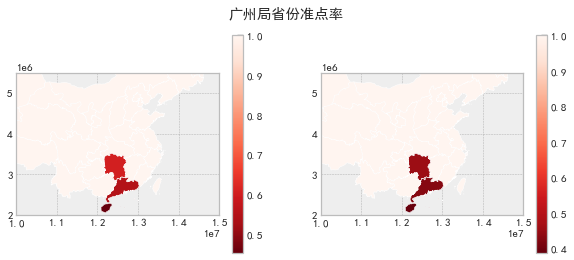

In [142]:
plotdf = data[['province','arrive_acc','depart_acc']].groupby('province').agg('mean').reset_index()
plotdf = pd.merge(province,plotdf,how='outer').fillna(1)
plotdf = gpd.GeoDataFrame(plotdf)
plt.style.use('bmh')
fig,ax = plt.subplots(1,2)
# plt.figure(figsize=[5,10])
# fig.suptitle('全国省份准点率')
# fig.suptitle('广州局省份准点率')
fig.suptitle('广州局省份准点率')
plotdf.plot('depart_acc', ax=ax[0],cmap='Reds_r',legend=True)
plotdf.plot('arrive_acc', ax=ax[1],cmap='Reds_r',legend=True)
ax[0].set_ylim([2e6,5.5e6])
ax[1].set_ylim([2e6,5.5e6])
ax[0].set_xlim([1e7,1.5e7])
ax[1].set_xlim([1e7,1.5e7])
# ax.tick_params(axis='x', rotation=45)
# ax.legend(['arrive','depart'])
sns.set(rc={'figure.figsize':(10,4)})
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

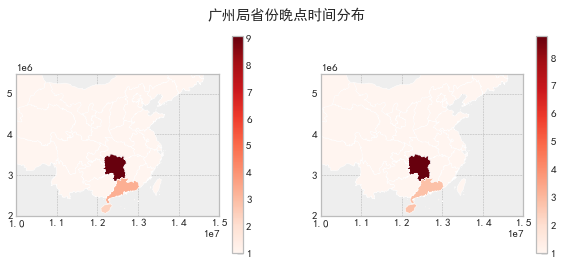

In [143]:
plotdf = data[['province','late_arrive','late_depart']].groupby('province').agg('mean').reset_index()
plotdf = pd.merge(province,plotdf,how='outer').fillna(1)
plotdf = gpd.GeoDataFrame(plotdf)
plt.style.use('bmh')
fig,ax = plt.subplots(1,2)
# fig.suptitle('全国省份晚点时间分布')
fig.suptitle('广州局省份晚点时间分布')
plotdf.plot('late_depart', ax=ax[0],cmap='Reds',legend=True)
plotdf.plot('late_arrive', ax=ax[1],cmap='Reds',legend=True)
# ax.tick_params(axis='x', rotation=45)
# ax.legend(['arrive','depart'])
ax[0].set_ylim([2e6,5.5e6])
ax[1].set_ylim([2e6,5.5e6])
ax[0].set_xlim([1e7,1.5e7])
ax[1].set_xlim([1e7,1.5e7])
sns.set(rc={'figure.figsize':(10,4)})
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

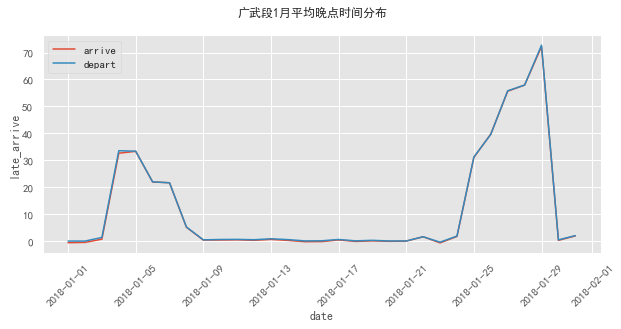

In [22]:
late_arrive_day = data[['date','late_arrive']].groupby('date').agg('mean').reset_index()
late_arrive_day['date'] = pd.to_datetime( late_arrive_day['date'])
late_arrive_day = late_arrive_day.sort_values('date')
# late_arrive_day
late_depart_day = data[['date','late_depart']].groupby('date').agg('mean').reset_index()
late_depart_day['date'] = pd.to_datetime( late_depart_day['date'])
late_depart_day = late_depart_day.sort_values('date')
# late_depart_day

# data['date'] = pd.to_datetime( data['date'])
data['hour'] = [_.hour for _ in data['std_depart']]
plotdf = data.groupby('hour').agg('mean').reset_index()

plt.style.use('ggplot')
fig,ax = plt.subplots()
# fig.suptitle('1月平均晚点时间分布')
fig.suptitle('广武段1月平均晚点时间分布')
sns.lineplot(
  data = late_arrive_day,
  x = 'date',
  y = 'late_arrive',
  ax=ax,
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
# ax[0].tick_params(axis='x', rotation=45)
sns.lineplot(
  data = late_depart_day,
  x = 'date',
  y = 'late_depart',
  ax=ax,
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
# ax.set_xticks(range(0,24))
# ax.tick_params(axis='x', rotation=45)
ax.legend(['arrive','depart'])
sns.set(rc={'figure.figsize':(10,4)})
ax.tick_params(axis='x', rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

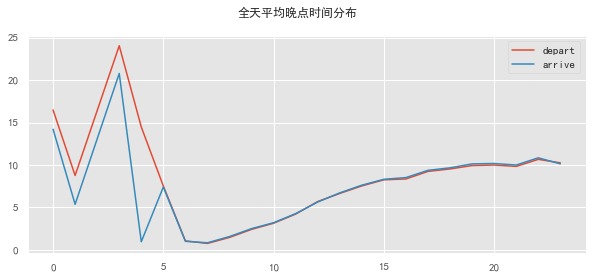

In [187]:
data['hour'] = data['std_depart'].apply(lambda x : x.hour)
late_depart_hour = data[['hour','late_depart']].groupby('hour').agg('mean').reset_index()
# late_depart_hour
late_arrive_hour = data[['hour','late_arrive']].groupby('hour').agg('mean').reset_index()
# late_arrive_hour

# data['date'] = pd.to_datetime( data['date'])
data['hour'] = [_.hour for _ in data['std_depart']]
plotdf = data.groupby('hour').agg('mean').reset_index()

plt.style.use('ggplot')
fig,ax = plt.subplots()
fig.suptitle('全天平均晚点时间分布')
ax.plot(
    late_depart_hour['hour'],
    late_depart_hour['late_depart'],
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
# ax[0].tick_params(axis='x', rotation=45)
ax.plot(
    late_arrive_hour['hour'],
    late_arrive_hour['late_arrive'],
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
# ax.set_xticks(range(0,24))
# ax.tick_params(axis='x', rotation=45)
ax.legend(['depart','arrive'])
sns.set(rc={'figure.figsize':(10,4)})
# ax.tick_params(axis='x', rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
data.code.unique()

array(['D1', 'D10', 'D101', ..., 'G9662', 'G9663', 'G9664'], dtype=object)

3. 分析车次

In [85]:
# routine = data.loc[data['code']=='G1653'].reset_index()
routine = data.loc[data['code']=='G557'].reset_index()
routine.columns
import pandas as pd
from datetime import datetime
def offset_day(col):
    col = col.apply(lambda dt: dt.replace(day=1))
    return col
for colname in ['std_arrive', 'real_arrive', 'std_depart', 'real_depart']:
    routine[colname] = offset_day(routine[colname])


In [95]:
len(routine.loc[(routine['late_arrive'] <= 1) &
                (routine['late_arrive'] >= -1)]) / len(routine)


0.5955882352941176

In [96]:
len(routine.loc[(routine['late_depart'] <= 1) &
                (routine['late_depart'] >= -1)]) / len(routine)

0.5563725490196079

<Figure size 360x288 with 0 Axes>

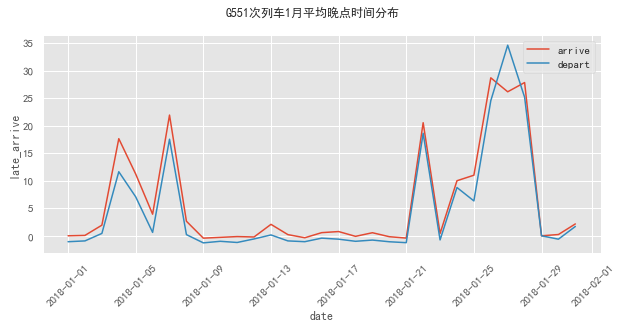

In [98]:
late_arrive_day = routine[['date','late_arrive']].groupby('date').agg('mean').reset_index()
late_arrive_day['date'] = pd.to_datetime( late_arrive_day['date'])
late_arrive_day = late_arrive_day.sort_values('date')
# late_arrive_day
late_depart_day = routine[['date','late_depart']].groupby('date').agg('mean').reset_index()
late_depart_day['date'] = pd.to_datetime( late_depart_day['date'])
late_depart_day = late_depart_day.sort_values('date')
# late_depart_day

# data['date'] = pd.to_datetime( data['date'])
routine['hour'] = [_.hour for _ in routine['std_depart']]
plotdf = routine.groupby('hour').agg('mean').reset_index()
plt.figure(figsize=[5,4])
plt.style.use('ggplot')
fig,ax = plt.subplots()
fig.suptitle('G551次列车1月平均晚点时间分布')
sns.lineplot(
  data = late_arrive_day,
  x = 'date',
  y = 'late_arrive',
  ax=ax,
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
# ax[0].tick_params(axis='x', rotation=45)
sns.lineplot(
  data = late_depart_day,
  x = 'date',
  y = 'late_depart',
  ax=ax,
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
# ax.set_xticks(range(0,24))
# ax.tick_params(axis='x', rotation=45)
ax.legend(['arrive','depart'])
sns.set(rc={'figure.figsize':(10,4)})
ax.tick_params(axis='x', rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

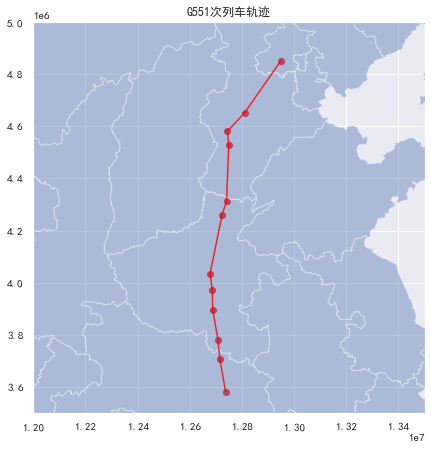

In [90]:
routine = routine.to_crs(3857)
plotdf = routine.loc[routine['date']=='2018/1/23'].sort_values('real_depart').reset_index()
ax = plotdf.plot(color='red',alpha=0.8)
line = LineString(plotdf['geometry'])
line = gpd.GeoSeries({'geometry':line})
line.plot(ax=ax,color='red',alpha=0.8)
province.plot(ax = ax, alpha=0.4)
ax.set_ylim([3.5e6,5e6])
ax.set_xlim([1.2e7,1.35e7])
# ax.set_title('G1653次列车轨迹')
ax.set_title('G551次列车轨迹')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# ax.y (routine.loc[routine['date']=='2018/1/23'].sort_values('real_depart').reset_index().name)

In [89]:
plotdf.name

0      北京西
1      定州东
2      石家庄
3      高邑西
4      安阳东
5      鹤壁东
6      许昌东
7      漯河西
8     驻马店西
9      信阳东
10     孝感北
11      武汉
Name: name, dtype: object

In [99]:

new_routine = routine[['name', 'std_arrive']].groupby('name').agg('mean')
new_routine = pd.merge(new_routine,
                routine[['name', 'real_arrive']].groupby('name').agg('mean'),
                left_index=True,right_index=True)
new_routine = pd.merge(new_routine,
                routine[['name', 'std_depart']].groupby('name').agg('mean'),
                left_index=True,right_index=True)
new_routine = pd.merge(new_routine,
                routine[['name', 'real_depart']].groupby('name').agg('mean'),
                left_index=True,right_index=True)
def functemp(x):
    return x.iloc[0]
new_routine = pd.merge(new_routine,
                routine[['name', 'geometry']].groupby('name').agg(functemp),
                left_index=True,right_index=True)
routine = new_routine.sort_values('real_arrive')
routine = routine.reset_index() 

In [100]:
routine['distance'] = [0 for i in range(len(routine))]
routine['cum_distance'] = [0 for i in range(len(routine))]
for i, row in routine.iterrows():
    if i == 0:
        pre_geo = row['geometry']
        continue
    new_geo = row['geometry']
    routine.loc[i,'distance'] = new_geo.distance(pre_geo)
    routine.loc[i,'cum_distance'] = routine.loc[i-1,'cum_distance'] + routine.loc[i,'distance']
    pre_geo = new_geo
routine

name                    std_arrive                   real_arrive  \
0    北京西 2018-01-01 11:06:59.999999744 2018-01-01 11:06:09.230769152   
1    定州东 2018-01-01 12:01:00.000000000 2018-01-01 12:00:35.624999936   
2    石家庄 2018-01-01 12:26:00.000000256 2018-01-01 12:28:20.689655040   
3    高邑西 2018-01-01 12:44:00.000000000 2018-01-01 12:46:00.000000000   
4    安阳东 2018-01-01 13:27:00.000000000 2018-01-01 13:31:16.875000064   
5    鹤壁东 2018-01-01 13:44:00.000000000 2018-01-01 13:47:35.510204160   
6    许昌东 2018-01-01 14:45:00.000000000 2018-01-01 14:53:16.551724288   
7    漯河西 2018-01-01 15:03:00.000000000 2018-01-01 15:14:22.500000000   
8   驻马店西 2018-01-01 15:23:00.000000000 2018-01-01 15:35:35.744680960   
9    明港东 2018-01-01 15:48:00.000000000 2018-01-01 16:01:50.769230848   
10   信阳东 2018-01-01 16:28:00.000000000 2018-01-01 16:38:32.903225856   
11   孝感北 2018-01-01 17:03:00.000000000 2018-01-01 17:10:15.483870976   
12    武汉 2018-01-01 17:46:59.999999744 2018-01-01 17:54:46.153846272   

                      std_depart                   real_depart  \
0  2018-01-01 11:06:59.999999744 2018-01-01 11:06:09.230769152   
1  2018-01-01 12:03:00.000000000 2018-01-01 12:03:16.875000064   
2  2018-01-01 12:29:00.000000000 2018-01-01 12:31:37.241379328   
3  2018-01-01 12:46:00.000000000 2018-01-01 12:50:55.909091072   
4  2018-01-01 13:29:00.000000000 2018-01-01 13:33:05.624999936   
5  2018-01-01 13:46:00.000000000 2018-01-01 13:49:00.000000000   
6  2018-01-01 14:47:00.000000000 2018-01-01 14:54:55.862068992   
7  2018-01-01 15:05:00.000000000 2018-01-01 15:16:26.249999872   
8  2018-01-01 15:31:00.000000000 2018-01-01 15:39:40.851063808   
9  2018-01-01 16:14:59.999999744 2018-01-01 16:22:02.307692288   
10 2018-01-01 16:45:00.000000000 2018-01-01 16:49:15.483870976   
11 2018-01-01 17:16:00.000000000 2018-01-01 17:17:52.258064384   
12 2018-01-01 17:46:59.999999744 2018-01-01 17:54:46.153846272   

                            geometry       distance  cum_distance  
0   POINT (12948912.042 4850682.618)       0.000000  0.000000e+00  
1   POINT (12810079.828 4651525.757)  242771.165958  2.427712e+05  
2   POINT (12744425.039 4580866.548)   96453.486379  3.392247e+05  
3   POINT (12749464.027 4527255.525)   53847.314347  3.930720e+05  
4   POINT (12740903.336 4312209.774)  215216.077793  6.082880e+05  
5   POINT (12723712.712 4260318.006)   54665.100088  6.629531e+05  
6   POINT (12677872.125 4035298.786)  229641.043435  8.925942e+05  
7   POINT (12686411.666 3971536.909)   64331.179775  9.569254e+05  
8   POINT (12688062.979 3895380.285)   76174.524647  1.033100e+06  
9   POINT (12697637.680 3827398.189)   68653.042702  1.101753e+06  
10  POINT (12708152.919 3782211.703)   46393.843994  1.148147e+06  
11  POINT (12715010.979 3709086.841)   73445.752220  1.221593e+06  
12  POINT (12737656.369 3581775.911)  129309.266705  1.350902e+06

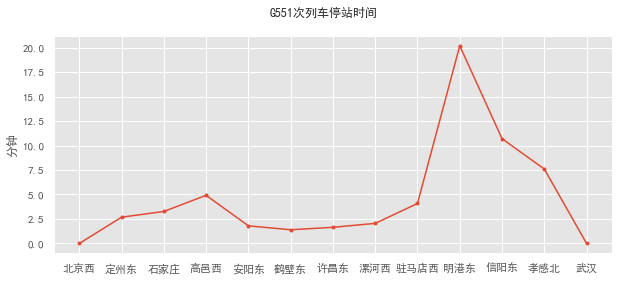

In [101]:
stop_time = routine['real_depart']-routine['real_arrive']

plt.style.use('ggplot')
fig,ax = plt.subplots()
# fig.suptitle('G1653次列车停站时间')
fig.suptitle('G551次列车停站时间')
ax.plot(
    routine['name'],
    [(_.seconds/60) for _ in stop_time],
    marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
ax.set_ylabel('分钟')
# ax[0].tick_params(axis='x', rotation=45)
# ax.set_xticks(range(0,24))
# ax.tick_params(axis='x', rotation=45)
# ax.legend(['depart','arrive'])
sns.set(rc={'figure.figsize':(10,4)})
# ax.tick_params(axis='x', rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [103]:
section_name = (routine['name'] + ['-' for i in range(len(routine))] + routine['name'].shift(-1))[:-1]
section_name

0      北京西-定州东
1      定州东-石家庄
2      石家庄-高邑西
3      高邑西-安阳东
4      安阳东-鹤壁东
5      鹤壁东-许昌东
6      许昌东-漯河西
7     漯河西-驻马店西
8     驻马店西-明港东
9      明港东-信阳东
10     信阳东-孝感北
11      孝感北-武汉
Name: name, dtype: object

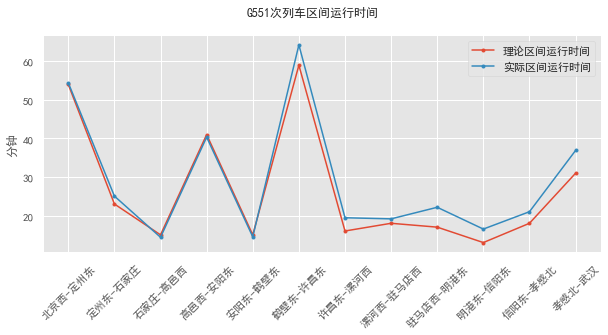

In [104]:
real_section_time = (routine['real_arrive'].shift(-1) - routine['real_depart'])[:-1]
std_section_time =  (routine['std_arrive'].shift(-1) - routine['std_depart'])[:-1]
plt.style.use('ggplot')
fig,ax = plt.subplots()
# fig.suptitle('G1653次列车区间运行时间')
fig.suptitle('G551次列车区间运行时间')
ax.plot(
    section_name,
    [(_.seconds/60) for _ in std_section_time],
    marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
ax.plot(
    section_name,
    [(_.seconds/60) for _ in real_section_time],
    marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
ax.set_ylabel('分钟')
# ax[0].tick_params(axis='x', rotation=45)
# ax.set_xticks(range(0,24))
ax.tick_params(axis='x', rotation=45)
ax.legend(['理论区间运行时间','实际区间运行时间'])
sns.set(rc={'figure.figsize':(10,4)})
# ax.tick_params(axis='x', rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

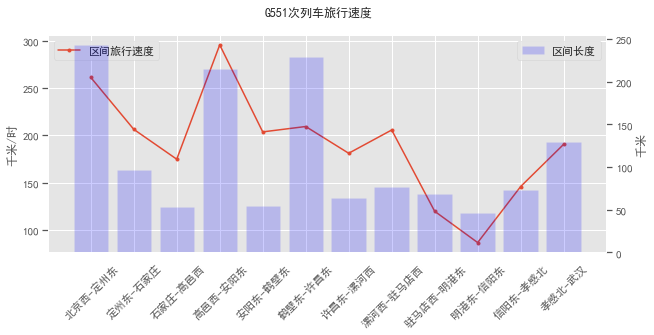

In [105]:
trave_time = (stop_time/2)[:-1] + (stop_time.shift(-1)/2)[:-1] + real_section_time
travel_spd = routine['distance'][1:] / [_.seconds for _ in trave_time] * 3.6
travel_spd


plt.style.use('ggplot')
fig,ax = plt.subplots()
# fig.suptitle('G1653次列车旅行速度')
fig.suptitle('G551次列车旅行速度')
axtwin = ax.twinx()
axtwin.bar(
    section_name,
    routine['distance'][1:]/1000,
    alpha = 0.2,
    color='blue'
)
axtwin.grid(False)
ax.plot(
    section_name,
    travel_spd,
    marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)


axtwin.set_ylabel('千米')
ax.set_ylabel('千米/时')
# ax[0].tick_params(axis='x', rotation=45)
# ax.set_xticks(range(0,24))
ax.tick_params(axis='x', rotation=45)
axtwin.legend(['区间长度',],loc='upper right')
ax.legend(['区间旅行速度',],loc='upper left')
sns.set(rc={'figure.figsize':(10,4)})
# ax.tick_params(axis='x', rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [263]:
routine['distance'][1:]

1     169946.583704
2      72549.905174
3      99707.782798
4     118467.061602
5      42209.325565
6      37571.851919
7     128619.986741
8     112105.941499
9     130782.221458
10     98563.011210
11     72131.931450
12     68793.979863
Name: distance, dtype: float64

4. 车站分析

In [16]:
onestation = data.loc[data['name']=='松江南']
# onestation

In [31]:
len(onestation.loc[(onestation['late_arrive'] <= 1) &
                (onestation['late_arrive'] >= -1)]) / len(onestation),


(0.5050625372245384,)

In [30]:
len(onestation.loc[(onestation['late_depart'] <= 1) &
                (onestation['late_depart'] >= -1)]) / len(onestation)

0.6771888028588445

In [7]:
onestation

code name          std_arrive         real_arrive  late_arrive  \
22616    D2285  松江南 2018-01-21 09:19:00 2018-01-21 09:19:00            0   
22619    D2285  松江南 2018-01-22 09:19:00 2018-01-22 09:19:00            0   
22622    D2285  松江南 2018-01-23 09:19:00 2018-01-23 09:20:00            1   
22625    D2285  松江南 2018-01-24 09:19:00 2018-01-24 09:20:00            1   
22628    D2285  松江南 2018-01-25 09:19:00 2018-01-25 09:19:00            0   
...        ...  ...                 ...                 ...          ...   
1074280  G7600  松江南 2018-01-18 17:56:00 2018-01-18 18:04:00            8   
1074284  G7600  松江南 2018-01-19 17:56:00 2018-01-19 17:58:00            2   
1074288  G7600  松江南 2018-01-20 17:56:00 2018-01-20 18:05:00            9   
1074293  G7600  松江南 2018-01-21 17:56:00 2018-01-21 18:02:00            6   
1074298  G7600  松江南 2018-01-22 17:56:00 2018-01-22 17:59:00            3   

                 std_depart         real_depart  late_depart       date  \
22616   2018-01-21 09:24:00 2018-01-21 09:22:00           -2  2018/1/21   
22619   2018-01-22 09:24:00 2018-01-22 09:23:00           -1  2018/1/22   
22622   2018-01-23 09:24:00 2018-01-23 09:23:00           -1  2018/1/23   
22625   2018-01-24 09:24:00 2018-01-24 09:23:00           -1  2018/1/24   
22628   2018-01-25 09:24:00 2018-01-25 09:23:00           -1  2018/1/25   
...                     ...                 ...          ...        ...   
1074280 2018-01-18 17:58:00 2018-01-18 18:05:00            7  2018/1/18   
1074284 2018-01-19 17:58:00 2018-01-19 17:59:00            1  2018/1/19   
1074288 2018-01-20 17:58:00 2018-01-20 18:06:00            8  2018/1/20   
1074293 2018-01-21 17:58:00 2018-01-21 18:03:00            5  2018/1/21   
1074298 2018-01-22 17:58:00 2018-01-22 18:00:00            2  2018/1/22   

                lon        lat                    geometry  index_right  \
22616    121.229723  30.982863  POINT (121.22972 30.98286)            8   
22619    121.229723  30.982863  POINT (121.22972 30.98286)            8   
22622    121.229723  30.982863  POINT (121.22972 30.98286)            8   
22625    121.229723  30.982863  POINT (121.22972 30.98286)            8   
22628    121.229723  30.982863  POINT (121.22972 30.98286)            8   
...             ...        ...                         ...          ...   
1074280  121.229723  30.982863  POINT (121.22972 30.98286)            8   
1074284  121.229723  30.982863  POINT (121.22972 30.98286)            8   
1074288  121.229723  30.982863  POINT (121.22972 30.98286)            8   
1074293  121.229723  30.982863  POINT (121.22972 30.98286)            8   
1074298  121.229723  30.982863  POINT (121.22972 30.98286)            8   

        province  arrive_acc  depart_acc  
22616        上海市        True       False  
22619        上海市        True        True  
22622        上海市        True        True  
22625        上海市        True        True  
22628        上海市        True        True  
...          ...         ...         ...  
1074280      上海市       False       False  
1074284      上海市       False        True  
1074288      上海市       False       False  
1074293      上海市       False       False  
1074298      上海市       False       False  

[1679 rows x 16 columns]

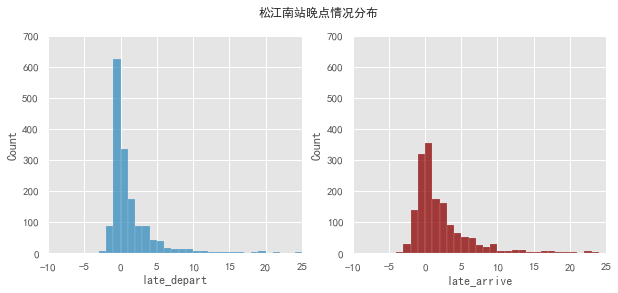

In [35]:
plt.style.use('ggplot')
fig,axes = plt.subplots(1,2)
fig.suptitle('松江南站晚点情况分布')
sns.histplot(
    ax = axes[0],
    data = onestation,
    binwidth=1,
    x='late_depart',
    # marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
sns.histplot(
    ax=axes[1],
    data = onestation,
    binwidth=1,
    x= 'late_arrive',
    color='darkred',
    # marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
for ax in axes:
  # ax.set_ylabel('分钟')
  ax.set_ylim([0,700])
  ax.set_xlim([-10,25])
  # ax[0].tick_params(axis='x', rotation=45)
  # ax.set_xticks(range(0,24))
  # ax.tick_params(axis='x', rotation=45)
# ax[].legend(['到达','出发'])
sns.set(rc={'figure.figsize':(10,4)})
# ax.tick_params(axis='x', rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

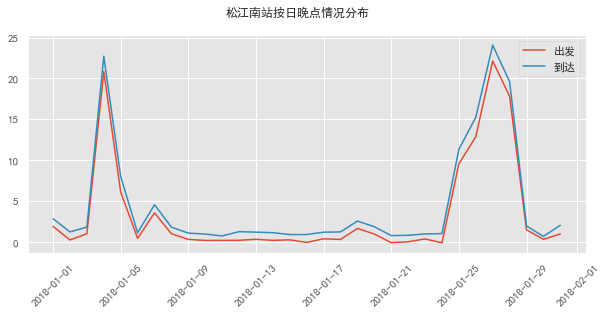

In [44]:
onestation_late_arrive_day = onestation[['date','late_arrive']].groupby('date').agg('mean').reset_index()
onestation_late_arrive_day['date'] = pd.to_datetime( onestation_late_arrive_day['date'])
onestation_late_arrive_day = onestation_late_arrive_day.sort_values('date')
# onestation_late_arrive_day
onestation_late_depart_day = onestation[['date','late_depart']].groupby('date').agg('mean').reset_index()
onestation_late_depart_day['date'] = pd.to_datetime( onestation_late_depart_day['date'])
onestation_late_depart_day = onestation_late_depart_day.sort_values('date')
# onestation_late_depart_day


plt.style.use('ggplot')
fig,ax = plt.subplots()
fig.suptitle('松江南站按日晚点情况分布')
ax.plot(
    onestation_late_depart_day['date'],
    onestation_late_depart_day['late_depart'],
    # binwidth=1,
    # x='late_depart',
    # marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
ax.plot(
    onestation_late_arrive_day['date'],
    onestation_late_arrive_day['late_arrive'],
    # binwidth=1,
    # x= 'late_arrive',
    # color='darkred',
    # marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
# for ax in axes:
  # ax.set_ylabel('分钟')
  # ax.set_ylim([0,700])
  # ax.set_xlim([-10,25])
ax.tick_params(axis='x', rotation=45)
  # ax.set_xticks(range(0,24))
  # ax.tick_params(axis='x', rotation=45)
ax.legend(['出发','到达'])
# sns.set(rc={'figure.figsize':(10,4)})
# ax.tick_params(axis='x', rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

d:\programs\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


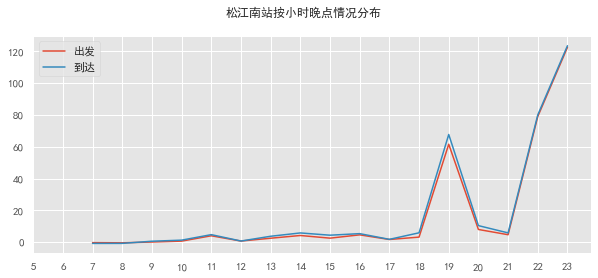

In [55]:
onestation['hour'] = [_.hour for _ in onestation['real_arrive']]
# onestation
onestation_late_arrive_hour = onestation[['hour','late_arrive']].groupby('hour').agg('mean').reset_index()
onestation_late_arrive_hour = onestation_late_arrive_hour.sort_values('hour')
# onestation_late_arrive_hour
onestation_late_depart_hour = onestation[['hour','late_depart']].groupby('hour').agg('mean').reset_index()
onestation_late_depart_hour = onestation_late_depart_hour.sort_values('hour')
# onestation_late_depart_hour


plt.style.use('ggplot')
fig,ax = plt.subplots()
fig.suptitle('松江南站按小时晚点情况分布')
ax.plot(
    onestation_late_depart_hour['hour'],
    onestation_late_depart_hour['late_depart'],
    # binwidth=1,
    # x='late_depart',
    # marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
ax.plot(
    onestation_late_arrive_hour['hour'],
    onestation_late_arrive_hour['late_arrive'],
    # binwidth=1,
    # x= 'late_arrive',
    # color='darkred',
    # marker='.'
  # kind="hist", 
  # aspect=1.4, 
  # log_scale=10, 
)
# for ax in axes:
  # ax.set_ylabel('分钟')
  # ax.set_ylim([0,700])
  # ax.set_xlim([-10,25])
# ax.tick_params(axis='x', rotation=45)
ax.set_xticks(range(5,24))
  # ax.tick_params(axis='x', rotation=45)
ax.legend(['出发','到达'])
# sns.set(rc={'figure.figsize':(10,4)})
# ax.tick_params(axis='x', rotation=45)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

5. 分析单线

In [56]:
def get_mean_acc(df):
    res0 = len(data.loc[df['late_arrive'] != 0]) / len(df)
    res1 = len(data.loc[df['late_depart'] != 0]) / len(df)
    return res0, res1
def get_late(df):
    res0 = df['late_arrive'].mean()
    res1 = df['late_depart'].mean()
    return res0, res1
def get_late_portion(df):
    for colname in ['std_arrive', 'real_arrive', 'std_depart', 'real_depart']:
        df[colname] = offset_day(df[colname])
    new_df = df[['name', 'std_arrive']].groupby('name').agg('mean')
    new_df = pd.merge(new_df,
                    df[['name', 'real_arrive']].groupby('name').agg('mean'),
                    left_index=True,right_index=True)
    new_df = pd.merge(new_df,
                    df[['name', 'std_depart']].groupby('name').agg('mean'),
                    left_index=True,right_index=True)
    new_df = pd.merge(new_df,
                    df[['name', 'real_depart']].groupby('name').agg('mean'),
                    left_index=True,right_index=True)
    new_df = pd.merge(new_df,
                    df[['name', 'late_arrive']].groupby('name').agg('mean'),
                    left_index=True,right_index=True)
    new_df = pd.merge(new_df,
                    df[['name', 'geometry']].groupby('name').agg(functemp),
                    left_index=True,right_index=True)
    df = new_df.sort_values('real_arrive')
    df = df.reset_index() 
    df = gpd.GeoDataFrame(df, crs=4326)
    df = df.to_crs(3857)
    df['distance'] = [0 for i in range(len(df))]
    df['cum_distance'] = [0 for i in range(len(df))]
    for i, row in df.iterrows():
        if i == 0:
            pre_geo = row['geometry']
            continue
        new_geo = row['geometry']
        df.loc[i,'distance'] = new_geo.distance(pre_geo)
        df.loc[i,'cum_distance'] = df.loc[i-1,'cum_distance'] + df.loc[i,'distance']
        pre_geo = new_geo
    real_section_time = (df['real_arrive'].shift(-1) - df['real_depart'])[:-1]
    std_section_time =  (df['std_arrive'].shift(-1) - df['std_depart'])[:-1]
    # spd = df['distance'][1:] / real_section_time
    delay_portion = df['late_arrive'][:-1] / [int(_.seconds/60) for _ in real_section_time]
    return delay_portion
    # return df
    
def functemp(x):
    return x.iloc[0]
def offset_day(col):
    col = col.apply(lambda dt: dt.replace(day=1))
    return col


In [12]:
# stationlist = '北京西站、涿州东站、高碑店东站、保定东站、定州东站、正定机场站、石家庄站、高邑西站、邢台东站、邯郸东站、安阳东站、鹤壁东站、新乡东站、郑州东站、许昌东站、漯河西站、驻马店西站、明港东站、信阳东站、孝感北站、武汉站、咸宁北站、赤壁北站、岳阳东站、汨罗东站、长沙南站、株洲西站、衡山西站、衡阳东站、郴州西站、韶关站、英德西站、清远站、广州北站、广州南站'
stationlist = '武汉站、咸宁北站、赤壁北站、岳阳东站、汨罗东站、长沙南站、株洲西站、衡山西站、衡阳东站、郴州西站、韶关站、英德西站、清远站、广州北站、广州南站'
stationlist = stationlist.split('、')
stationlist = [_[:-1] for _ in stationlist]
# stationlist
fullline = data.set_index('name', drop=False).loc[stationlist].reset_index(drop=True)
# fullline

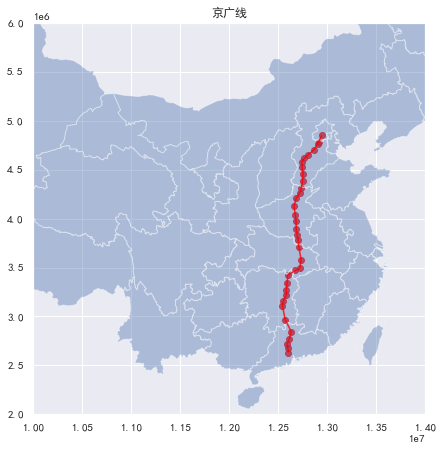

In [82]:
fullline = fullline.to_crs(3857)
fig,ax = plt.subplots()
plotdf = station.set_index('name').loc[stationlist]
plotdf['geometry'] = [Point(_.lon,_.lat) for i,_ in plotdf.iterrows()]
plotdf = gpd.GeoDataFrame(plotdf, crs=4326).to_crs(3857)
plotdf.plot(color='red',alpha=0.8,ax=ax)
line = LineString(plotdf['geometry'])
line = gpd.GeoSeries({'geometry':line})
line.plot(ax=ax,color='red',alpha=0.8)
province.plot(ax = ax, alpha=0.4)
ax.set_ylim([2e6,6e6])
ax.set_xlim([1e7,1.4e7])
ax.set_title('京广线')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# sns.set(rc={'figure.figsize':(10,4)})
# ax.y (routine.loc[routine['date']=='2018/1/23'].sort_values('real_depart').reset_index().name)

In [83]:
routine = data.loc[data['code']=='G557'].reset_index()

In [84]:
routine

index  code name          std_arrive         real_arrive  late_arrive  \
0    436980  G557  信阳东 2018-01-21 16:28:00 2018-01-21 16:28:00            0   
1    436981  G557  信阳东 2018-01-22 16:28:00 2018-01-22 16:54:00           26   
2    436982  G557  信阳东 2018-01-23 16:28:00 2018-01-23 16:29:00            1   
3    436983  G557  信阳东 2018-01-24 16:28:00 2018-01-24 16:38:00           10   
4    436984  G557  信阳东 2018-01-25 16:28:00 2018-01-25 16:47:00           19   
..      ...   ...  ...                 ...                 ...          ...   
403  973683  G557  许昌东 2018-01-18 14:45:00 2018-01-18 14:46:00            1   
404  973684  G557  许昌东 2018-01-19 14:45:00 2018-01-19 14:45:00            0   
405  973685  G557  许昌东 2018-01-20 14:45:00 2018-01-20 14:45:00            0   
406  973686  G557  许昌东 2018-01-21 14:45:00 2018-01-21 14:45:00            0   
407  973687  G557  许昌东 2018-01-22 14:45:00 2018-01-22 15:10:00           25   

             std_depart         real_depart  late_depart       date  \
0   2018-01-21 16:45:00 2018-01-21 16:44:00           -1  2018/1/21   
1   2018-01-22 16:45:00 2018-01-22 16:57:00           12  2018/1/22   
2   2018-01-23 16:45:00 2018-01-23 16:45:00            0  2018/1/23   
3   2018-01-24 16:45:00 2018-01-24 16:57:00           12  2018/1/24   
4   2018-01-25 16:45:00 2018-01-25 16:49:00            4  2018/1/25   
..                  ...                 ...          ...        ...   
403 2018-01-18 14:47:00 2018-01-18 14:47:00            0  2018/1/18   
404 2018-01-19 14:47:00 2018-01-19 14:47:00            0  2018/1/19   
405 2018-01-20 14:47:00 2018-01-20 14:46:00           -1  2018/1/20   
406 2018-01-21 14:47:00 2018-01-21 14:46:00           -1  2018/1/21   
407 2018-01-22 14:47:00 2018-01-22 15:11:00           24  2018/1/22   

            lon        lat                    geometry  index_right province  \
0    114.159280  32.143878  POINT (114.15928 32.14388)           15      河南省   
1    114.159280  32.143878  POINT (114.15928 32.14388)           15      河南省   
2    114.159280  32.143878  POINT (114.15928 32.14388)           15      河南省   
3    114.159280  32.143878  POINT (114.15928 32.14388)           15      河南省   
4    114.159280  32.143878  POINT (114.15928 32.14388)           15      河南省   
..          ...        ...                         ...          ...      ...   
403  113.887263  34.048370  POINT (113.88726 34.04837)           15      河南省   
404  113.887263  34.048370  POINT (113.88726 34.04837)           15      河南省   
405  113.887263  34.048370  POINT (113.88726 34.04837)           15      河南省   
406  113.887263  34.048370  POINT (113.88726 34.04837)           15      河南省   
407  113.887263  34.048370  POINT (113.88726 34.04837)           15      河南省   

     arrive_acc  depart_acc  
0          True        True  
1         False       False  
2          True        True  
3         False       False  
4         False       False  
..          ...         ...  
403        True        True  
404        True        True  
405        True        True  
406        True        True  
407       False       False  

[408 rows x 17 columns]

In [214]:
routine_delay_portion = get_late_portion(routine)
routine_delay_portion

0    -0.015670
1    -0.016250
2     0.167488
3     0.050000
4     0.305804
5     0.056122
6     0.435572
7     0.598684
8     0.572534
9     0.865385
10    0.502304
11    0.201613
Name: late_arrive, dtype: float64

In [215]:
# selected_stations = ['北京西','郑州东','广州南','武汉']
for selected_station in stationlist:
    selected = fullline.loc[fullline['name']==selected_station].reset_index()
# selected

In [7]:
# bjd_pv = ['北京市','河北省']
# zzd_pv = ['河南省']
# whd_pv = ['湖北省']
gzd_pv = ['广东省','湖南省','湖北省']
# bjd = data.loc[((data['province'] == bjd_pv[0]) | (data['province'] == bjd_pv[1]) )]
# zzd = data.loc[(data['province'] == zzd_pv[0])]
# whd = data.loc[(data['province'] == whd_pv[0])]
gzd = data.loc[((data['province'] == gzd_pv[0]) |
                (data['province'] == gzd_pv[1]) |
                (data['province'] == gzd_pv[2]))]

* 中观单线：
  * 出发准点率
  * 到达准点率
  * 平均到达延误时间
  * 平均出发延误时间
  * 延误时间极值点
  * 延误时间占区间运行时间比值
  * 开行总数量
  * 停站时间变化
* 微观车站：
  * 出发准点率
  * 到达准点率
  * 平均到达延误时间
  * 平均出发延误时间
  * 延误时间极值点
  * 服务频率
  * 垂直天窗大小
* 宏观广州局：
  * 出发准点率
  * 到达准点率
  * 平均到达延误时间
  * 平均出发延误时间
  

列车开行数量，一天的开行数量即服务频率
垂直天窗大小

6. 京广线武广段晚点事件影响

今日(1月4日)，受南方暴雪天气影响，北京西站多趟列车停运，京九线，京广线以及京广高铁线全部列车晚点运行。

　　15时30分许，记者从北京西站获悉，因南方暴雪，G585 次前往武汉、G669次前往西安 、G6735 前往邯郸邯郸 、G665前往西安、k261 前往汉中等多趟列车临时停运，乘客可凭车票免费退票。另外，京九线，京广线以及京广高铁线全部列车晚点运行。

2018年1月2日以来，陕西、河南、湖北、安徽、江苏等地先后出现大雪或暴雪。 [2] 
2018年1月3日18时，中央气象台发布暴雪橙色预警，经综合研判和应急会商，中国气象局领导18时签发重大气象灾害（暴雪）Ⅲ级应急响应的命令。 [3] 
2018年1月4日6时，中央气象台继续发布暴雪橙色预警：预计，2018年1月4日8时至5日8时，河南、湖北、湖南、安徽、江苏等地有大到暴雪，其中，安徽中部、江苏西南部等地局地有大暴雪(20～30毫米)。
2018年1月28日报道，江苏南京遭遇近10年来最大降雪，十万军民彻夜扫雪疏通城市道路。 [4] 
1月24日至1月29日9时，江苏、浙江、安徽、江西、河南、湖北、湖南、重庆、贵州、陕西10省(直辖市)49市(自治州)176个县(市、区)341.9万人受灾，2人死亡，直接经济损失25.5亿元

https://www.baidu.com/s?ie=utf-8&f=8&rsv_bp=1&rsv_idx=2&tn=baiduhome_pg&wd=2018%E5%B9%B41%E6%9C%88%E9%9B%AA%E7%81%BE%E4%BA%AC%E5%B9%BF%E7%BA%BF%E6%99%9A%E7%82%B9&oq=2018%E5%B9%B41%E6%9C%88%E9%9B%AA%E7%81%BE%E4%BA%AC%E5%B9%BF%E7%BA%BF%E6%99%9A%E7%82%B9&rsv_pq=e7c8b753001793b5&rsv_t=4436OkW3kjtlVF6ScuvWjJzVieiKvS7kjbViwpIiJTsi53S%2Fjtkk%2B1dxS6kx3JPmzJ40&rqlang=cn&rsv_enter=1&rsv_dl=tb&gpc=stf%3D1514736000%2C1517414400%7Cstftype%3D2&tfflag=1

https://www.zhihu.com/question/266160690/answer/303759540

https://www.sohu.com/a/219626297_119778

http://www.cneb.gov.cn/2018/01/05/ARTI1515122148379555.shtml

http://www.hkwb.net/news/content/2018-01/05/content_3439952_0.htm

In [10]:
from datetime import datetime as dt


In [315]:
fullline.name.unique()

array(['北京西', '涿州东', '高碑店东', '保定东', '定州东', '正定机场', '石家庄', '高邑西', '邢台东',
       '邯郸东', '安阳东', '鹤壁东', '新乡东', '郑州东', '许昌东', '漯河西', '驻马店西', '明港东',
       '信阳东', '孝感北', '武汉', '咸宁北', '赤壁北', '岳阳东', '汨罗东', '长沙南', '株洲西',
       '衡山西', '衡阳东', '郴州西', '韶关', '英德西', '清远', '广州北', '广州南'], dtype=object)

In [14]:
daylow = dt(year=2018, month=1, day=2, hour=0, minute=0)
dayhigh = dt(year=2018, month=1, day=6, hour=0, minute=0)
fullline.loc[(fullline['std_arrive'] <= dayhigh)
                & (fullline['std_arrive'] >= daylow)].groupby('province').agg('mean').sort_values('late_depart', ascending=False)

late_arrive  late_depart         lon        lat  index_right  \
province                                                                 
湖北省         25.510993    25.606929  114.329682  30.327553         16.0   
湖南省         14.592677    15.279264  113.002692  27.541495         17.0   
广东省         13.054515    13.431718  113.394899  24.097594         18.0   

          arrive_acc  depart_acc  
province                          
湖北省         0.341106    0.512991  
湖南省         0.390438    0.572757  
广东省         0.446035    0.462004

In [232]:
daylow = dt(year=2018, month=1, day=25, hour=0, minute=0)
dayhigh = dt(year=2018, month=1, day=29, hour=0, minute=0)
fullline.loc[(fullline['std_arrive'] <= dayhigh)
                & (fullline['std_arrive'] >= daylow)].groupby('province').agg('mean').sort_values('late_depart', ascending=False)

late_arrive  late_depart         lon        lat  index_right
province                                                              
湖北省         66.368117    65.571492  114.350622  30.484616         16.0
河南省         58.685179    57.584399  114.049064  34.046611         15.0
湖南省         45.427006    45.742081  112.999364  27.707128         17.0
北京市         39.023952    39.023952  116.322056  39.894910          0.0
河北省         32.231232    31.723155  114.876154  37.985226          2.0
广东省         30.504000    30.613200  113.311470  23.445574         18.0

In [97]:
plotdf = fullline.loc[(fullline['date']=='2018/1/2') 
                |(fullline['date']=='2018/1/3') 
                |(fullline['date']=='2018/1/4') 
                |(fullline['date']=='2018/1/5') 
                |(fullline['date']=='2018/1/6') 
                |(fullline['date']=='2018/1/7') 
                |(fullline['date']=='2018/1/8')
                |(fullline['date']=='2018/1/9')

                ].loc[fullline['name']=='武汉'].sort_values('real_depart')

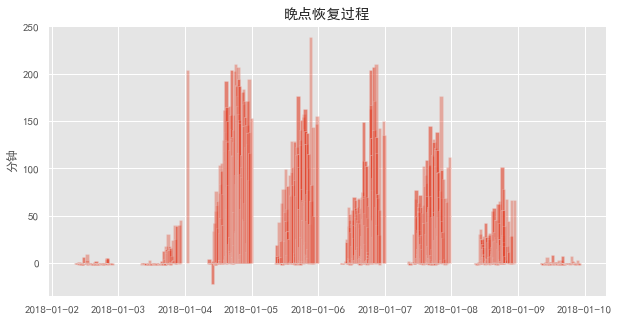

In [100]:
plt.figure(figsize = [10,5])
plt.style.use('ggplot')
plt.bar(plotdf['real_depart'], plotdf['late_depart'],width=0.05,alpha=0.4)
plt.title('晚点恢复过程')
plt.ylabel('分钟')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [86]:
fullline = data.loc[data['name']=='武汉']

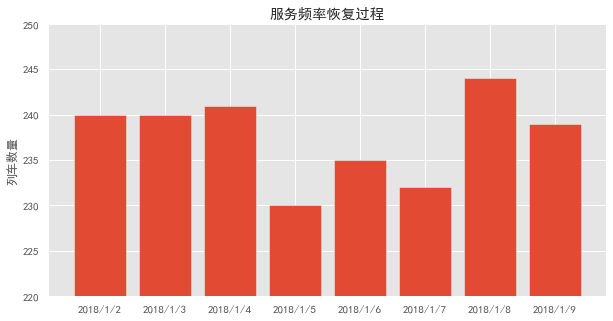

In [64]:
plotdf = fullline.loc[(fullline['date']=='2018/1/2') 
                |(fullline['date']=='2018/1/3') 
                |(fullline['date']=='2018/1/4') 
                |(fullline['date']=='2018/1/5') 
                |(fullline['date']=='2018/1/6') 
                |(fullline['date']=='2018/1/7') 
                |(fullline['date']=='2018/1/8')
                |(fullline['date']=='2018/1/9')

                ].loc[fullline['name']=='武汉'].groupby(['date','code']).agg('count')
datelist = ['2018/1/2',
            '2018/1/3',
            '2018/1/4',
            '2018/1/5',
            '2018/1/6',
            '2018/1/7',
            '2018/1/8',
            '2018/1/9']
plotres = [len(plotdf.loc[date]) for date in datelist]

plt.figure(figsize = [10,5])
plt.style.use('ggplot')
plt.bar(datelist, plotres)
plt.title('服务频率恢复过程')
plt.ylabel('列车数量')
plt.ylim([220,250])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [85]:
[_.seconds/60 for _ in plotdf['real_depart']]

[821.0, 817.0, 824.0, 1347.0, 1409.0, 910.0, 885.0, 845.0, 815.0, 815.0, 817.0]

d:\programs\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


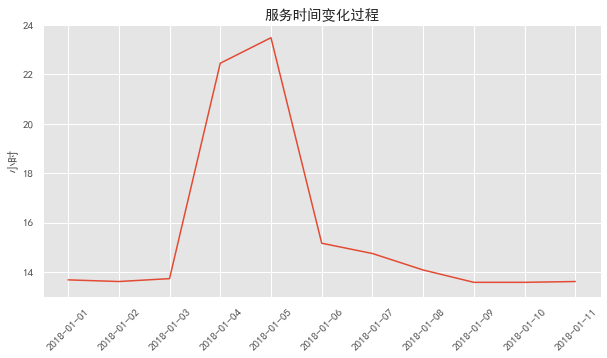

In [96]:

fullline['date'] = pd.to_datetime(fullline['date'])
plotdf = fullline[['date','real_depart']].groupby('date').agg('max').sort_index() - fullline[['date','real_depart']].groupby('date').agg('min').sort_index()
plotdf = plotdf[0:11]
plt.figure(figsize = [10,5])
plt.style.use('ggplot')
plt.plot([str(_).split(' ')[0] for _ in plotdf.index], [_.seconds/3600 for _ in plotdf['real_depart']])
plt.title('服务时间变化过程')
plt.ylabel('小时')
plt.tick_params(axis='x', rotation=45)
plt.ylim([13,24])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
plotdf = fullline.loc[(fullline['date']=='2018/1/7') 
                |(fullline['date']=='2018/1/6') 
                |(fullline['date']=='2018/1/8')
                |(fullline['date']=='2018/1/9')].loc[fullline['name']=='武汉'].sort_values('real_depart')

In [276]:
depart7 = fullline.loc[(fullline['date']=='2018/1/7'),'real_depart']
depart7.min(), depart7.max()

(Timestamp('2018-01-07 00:00:00'), Timestamp('2018-01-07 23:59:00'))

In [278]:
depart9 = fullline.loc[(fullline['date']=='2018/1/9'),'real_depart']
depart9.min(), depart9.max()

(Timestamp('2018-01-09 05:02:00'), Timestamp('2018-01-09 23:06:00'))

Text(0.5, 1.0, 'last train')

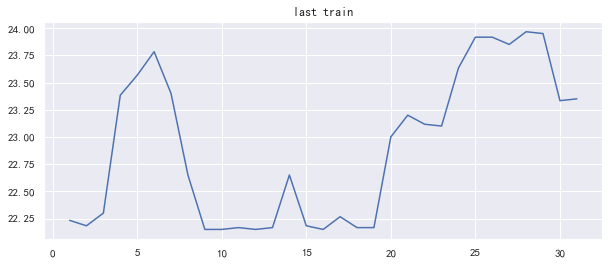

In [123]:
plotdf = fullline.loc[fullline['name']=='武汉'].groupby('date').agg('max').reset_index().sort_values('real_depart')
plt.plot(range(1,32), [(_.hour + _.minute/60) for _ in plotdf['real_depart']])

plt.title('last train')

Text(0.5, 1.0, 'first train')

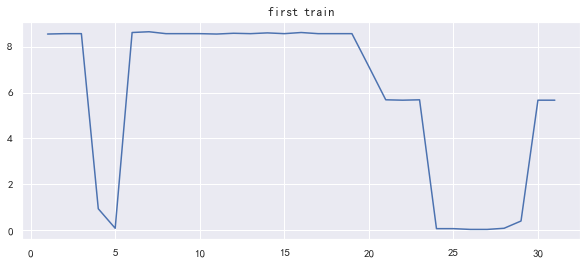

In [124]:
plotdf = fullline.loc[fullline['name']=='武汉'].groupby('date').agg('min').reset_index().sort_values('real_depart')
plt.plot(range(1,32), [(_.hour + _.minute/60) for _ in plotdf['real_depart']])
plt.title('first train')